In [2]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import cv2
from utils import *
from tensorflow.keras.models import model_from_json, load_model
from mtcnn.mtcnn import MTCNN
from pathlib import Path as path
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [3]:
tf.enable_eager_execution()

In [4]:
img_lst = pd.read_csv("test/test_list.csv")
img_lst.info()
img_lst = img_lst.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169396 entries, 0 to 169395
Data columns (total 1 columns):
paths    169396 non-null object
dtypes: object(1)
memory usage: 1.3+ MB


In [5]:
img_lst.shape

(169396, 1)

In [6]:
path = "test/"

In [7]:
img = plt.imread(path+img_lst[0][0])

In [8]:
img.shape

(227, 199, 3)

In [9]:
bb = detect_faces(img)

W0706 03:18:57.211447  3552 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0706 03:18:57.224425  3552 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0706 03:18:57.250343  3552 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0706 03:18:57.250343  3552 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 03:18:57.252308  3552 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\layer_factory.py:79: The name tf.get_variable is depr

In [10]:
bb

[[58, 63, 80, 107]]

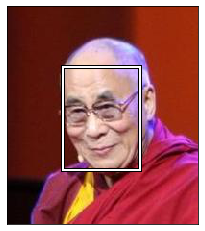

In [11]:
a = show_img(img)
draw_bb(a, bb[0])

In [12]:
model = load_model("Models/FaceNet/facenet_keras.h5")
features= extract_feature(model, img, bb[0])

W0706 03:19:04.135474  3552 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0706 03:19:04.138467  3552 deprecation_wrapper.py:119] From C:\Users\user\workspace\Face_recognition\utils.py:34: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



In [42]:
img_list = pd.read_csv("test/test_list.csv")
img_list = [ str(i[0]) for i in img_list.values ]

In [73]:
feature_rt_path = "test/image_features"
imgrt_path = "test"

In [74]:
os.listdir(feature_rt_path)

[]

In [ ]:
for i in img_list:
    img = plt.imread(imgrt_path+"/" + i)
    bb_lst = detect_faces(img)
    for i1 in range(len(bb_lst)):
        feature = extract_feature(model, img, bb_lst[i1])
        
        ###check to see if dirrectory e
        if os.path.isdir(feature_rt_path+"/"+i[:7]):
            np.save( feature_rt_path+"/"+i+".npy", feature)
        else:
            os.mkdir(feature_rt_path+"/"+i[:7])
            np.save( feature_rt_path+"/"+i+".npy", feature)
    

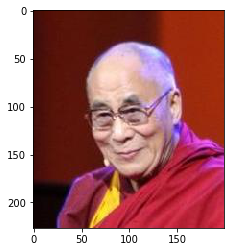

In [56]:
plt.imshow(img)

In [46]:
k = img_list[0]

In [49]:
d = k[:-4]

In [50]:
d

'n000001/0001_01'

In [60]:
os.path.isdir("test")

True

In [62]:
img_lst[-1]

array(['n009294/0291_01.jpg'], dtype=object)

In [71]:
os.path.isdir(feature_rt_path)

False